In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"
import warnings
warnings.filterwarnings("ignore")

import matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')

In [3]:
%load_ext autoreload
%autoreload 2

In [31]:
nsims = 15
t = 0
T = 1
S = 100
r = 0.03
mu = 0.01
sigma = 0.1
K = 110
B = 90

np.random.seed(13)
GBM = utils.GeometricBrownianMotion(x0 = S, mu = mu, sigma = sigma, T = T, Nt = 100)
paths = GBM.simulate(nsims = nsims)
time = GBM.timesteps

In [32]:
mask =  (np.min(paths,axis = 0) > B)
mask_pays = mask *  (paths[-1,:] > K)
mask_doesntpay = mask *  (paths[-1,:] <= K)
mask_deactivated =  (np.min(paths,axis = 0) <= B)

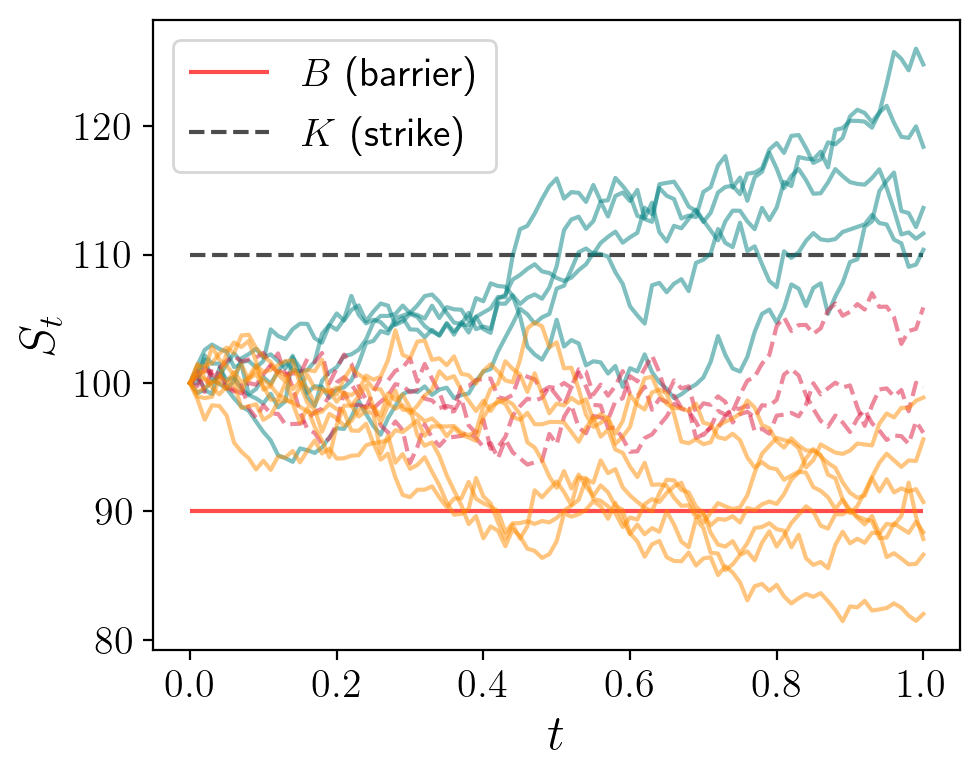

In [33]:
plt.figure(figsize=(5, 4))
plt.hlines(y = B, xmin = time[0], xmax = time[-1], color = 'r', linestyles='-', alpha = 0.7)
plt.hlines(y = K, xmin = time[0], xmax = time[-1], color = 'k', linestyles='--', alpha = 0.7)
plt.legend([r'$B$ (barrier)',r'$K$ (strike)'])
plt.plot(time, paths[:,mask_pays], color="teal", alpha=0.5, linestyle = '-')
plt.plot(time, paths[:,mask_doesntpay], color="crimson", alpha=0.5, linestyle = '--')
plt.plot(time, paths[:,mask_deactivated], color="darkorange", alpha=0.5, linestyle = '-')
resolution_value = 50
plt.xlabel(r'$t$', fontsize = 18)
plt.ylabel(r'$S_t$', fontsize = 18)
plt.tight_layout()
plt.savefig('../figures/payoff_barrier_illustrated.pdf', format="pdf", dpi=resolution_value)
plt.show()